# gw2 1:1 Bifurcation Diagrams

Testing using `hom` branch

# Inits

In [1]:
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
# user-defined
import nmCoupling as nm
# import nmCoupling_old as nm
import response as rp

import gw2

from lib.util import (get_phase, freq_est, get_tongue_1d, pl_exist_1d, get_period, bif1d, follow_phase_diffs, phase_lock_r3d, follow_locking_3d)

from lib.rhs import _redu_c, _full
from lib.plot_util import (add_diagram_1d_scatter, quick_plot_combined)

from generate_figures import _redu_3dc_gw as _redu_3dc

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sym

from scipy.optimize import root,bisect
from copy import deepcopy
import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

nmc = nm.nmCoupling
rsp = rp.Response

## Dicts

In [2]:
kw_sim = {'rtol':1e-8,'atol':1e-8,'method':'LSODA'}

In [3]:
pd1 = {'v1':.84,'v2':.42,'v4':.35,'v6':.35,'v8':1,'k1':1,'k2':1,'k3':.7,
       'k4':1,'k5':.7,'k6':1,'k7':.35,'k8':1,'K':0.5,'kc':1,'n':6,
       'L':0,'del':0,'om':1,'om_fix':1}
# pd1 = {'v1':.5,'v2':.5,'v4':.5,'v6':.3,'v8':1,'k1':.8,'k2':.3,'k3':.7,
#        'k4':.3,'k5':.7,'k6':1,'k7':.35,'k8':1,'K':0.5,'kc':1,'n':6,
#        'L':0,'del':0,'om':1,'om_fix':1}

In [4]:
kws1 = {'var_names':['x','y','z','v'],
        'pardict':pd1,
        'rhs':gw2.rhs,
        'coupling':gw2.coupling,
        'init':np.array([.3882,.523,1.357,.4347,24.2]),
         # 'init':np.array([.381,.251,.768,.136,10.1]),
        'TN':10000,
        'trunc_order':2,
        'z_forward':False,
        'i_forward':[False,True,False,False,False,False],
        'i_bad_dx':[False,True,False,False,False,False],
        'max_iter':50,
        'rtol':1e-12,
        'atol':1e-12,
        'rel_tol':1e-9,
        'save_fig':False,
        'lc_prominence':.05,
        'factor':1}

## Defs

In [5]:
kw_bif = {'method':'LSODA','dense_output':True,'rtol':1e-9,'atol':1e-9}

In [6]:
eps_list11r = np.linspace(0.001,.1,50)
etup11 = (.001,.1,50)

In [7]:
x_temp = np.linspace(-np.pi,3*np.pi,500)

## Initialize Response Functions

In [8]:
system1 = rsp(idx=0,model_name='hom2_gw0',**kws1)
system2 = rsp(idx=1,model_name='hom2_gw1',**kws1)

mkdir ./data/hom2_gw0/
* Loading LC data...
self.T 24.246927227621597 omfix 1
* Loading monodromy...
Monodromy
[[ 2.68093190e-01  8.85345872e-02 -8.24037644e-02  0.00000000e+00]
 [-4.25879376e+00 -8.00509797e-01  1.67577089e+00  0.00000000e+00]
 [-4.90565074e+00 -9.69034047e-01  1.90189172e+00  0.00000000e+00]
 [-5.97500437e-01 -1.04936273e-01  2.39572215e-01  1.86404867e-10]]

g1,z0,i0 inits
[0.07152114 0.71700846 0.68236179 0.12315027]
[10.25044553  2.49099692 -3.69186759 -0.        ]
[10.1444998   3.35018897 -3.11808195  0.        ]

* Floquet Exponent kappa =-0.04106396665890106
* Computing g symbolic...
* Computing g...
dx=6.92e-14, al=9.09e-01                   
* Computing heterogeneous terms...
* Computing z...
dx=1.14e-10, al=9.09e-01                   
* Computing i...
dx=2.66e-10, al=1.00e+00                   
mkdir ./data/hom2_gw1/
* Loading LC data...
self.T 24.246927227621597 omfix 1
* Loading monodromy...
Monodromy
[[ 2.68093190e-01  8.85345872e-02 -8.24037644e-02  0.00

In [9]:
recompute_list = ['h_data_hom2_gw0','h_data_hom2_gw1','p_data_hom2_gw0','p_data_hom2_gw1']
# recompute_list = []
kw_nm = {'system1':system1,'system2':system2,'_n':('om0',1),'_m':('om1',1),
         'NH':1024,'save_fig':False,'recompute_list':recompute_list}

# del=0.0

pfactor 4
* Computing p symbolic...
* Computing p symbolic...
p fname ./data/hom2_gw0/p_data_ord=0_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.txt
p order=0
p fname ./data/hom2_gw1/p_data_ord=0_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.txt
p order=0
p fname ./data/hom2_gw0/p_data_ord=1_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.txt
p order=1
del values 0.0 0.0


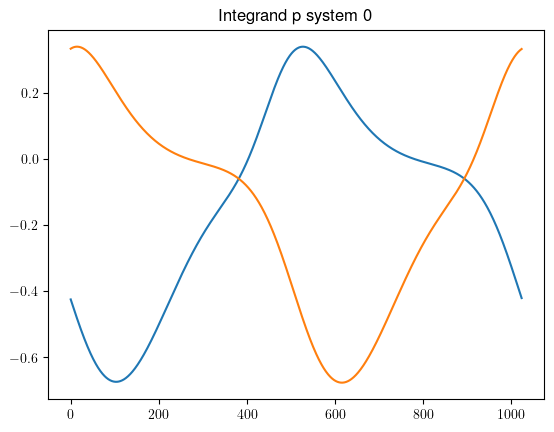

p fname ./data/hom2_gw1/p_data_ord=1_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.txt
p order=1
del values 0.0 0.0


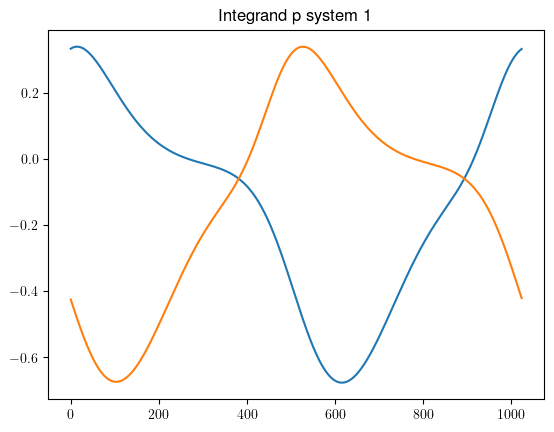

p fname ./data/hom2_gw0/p_data_ord=2_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.txt
p order=2
del values 0.0 0.0


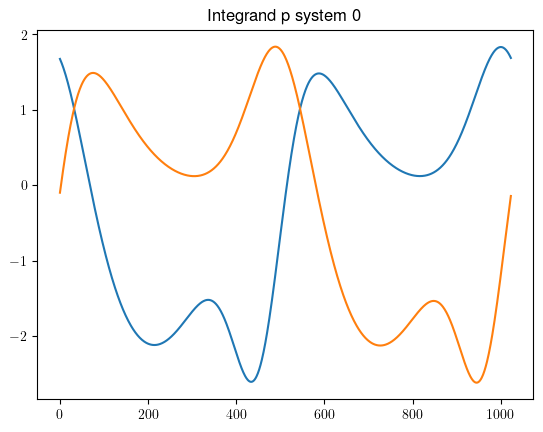

p fname ./data/hom2_gw1/p_data_ord=2_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.txt
p order=2
del values 0.0 0.0


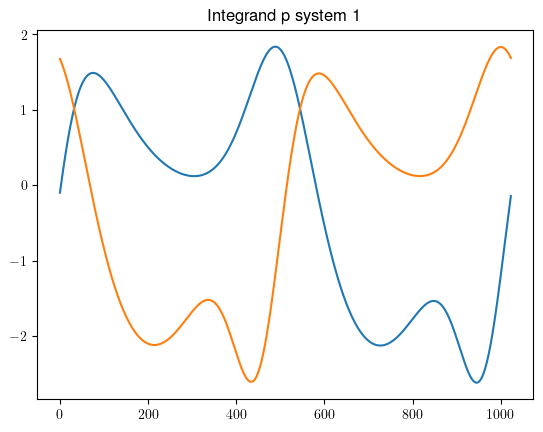

* Computing H symbolic...
* Computing H symbolic...
* Computing H hom2_gw0, order=0...


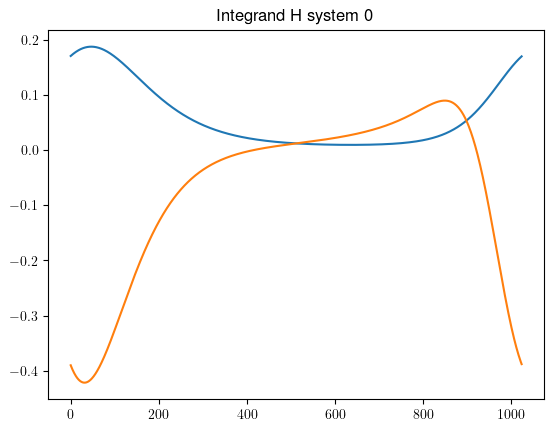

* Computing H hom2_gw1, order=0...


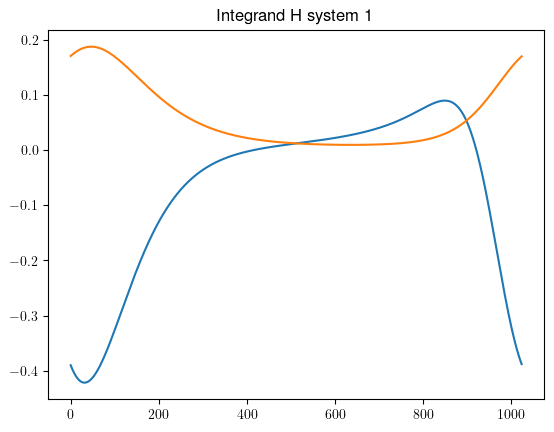

* Computing H hom2_gw0, order=1...


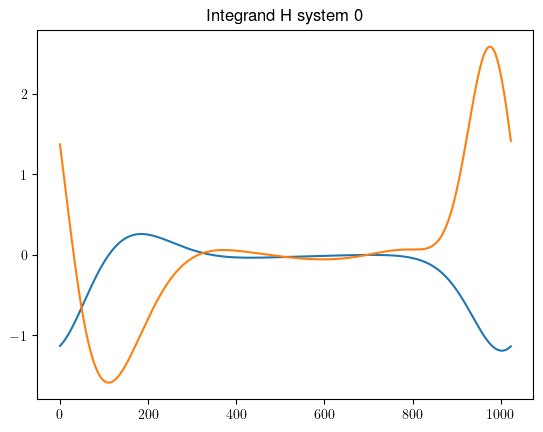

* Computing H hom2_gw1, order=1...


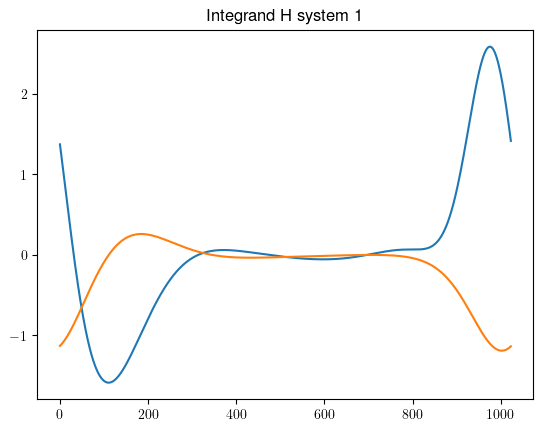

* Computing H hom2_gw0, order=2...


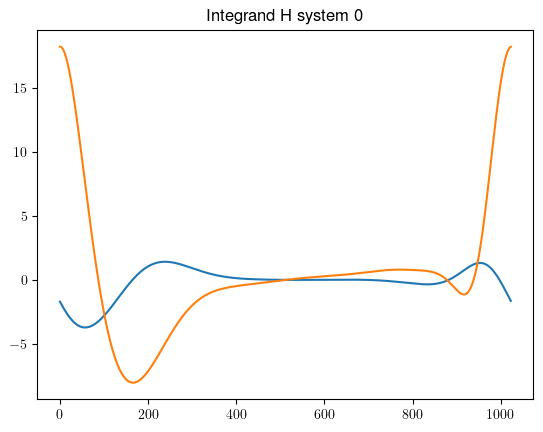

* Computing H hom2_gw1, order=2...


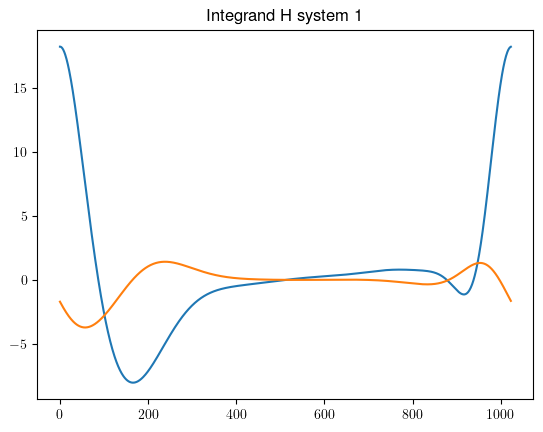

In [10]:
del11_p0 = 0
a11_p0 = nm.nmCoupling(**kw_nm, del1=del11_p0)

## H functions

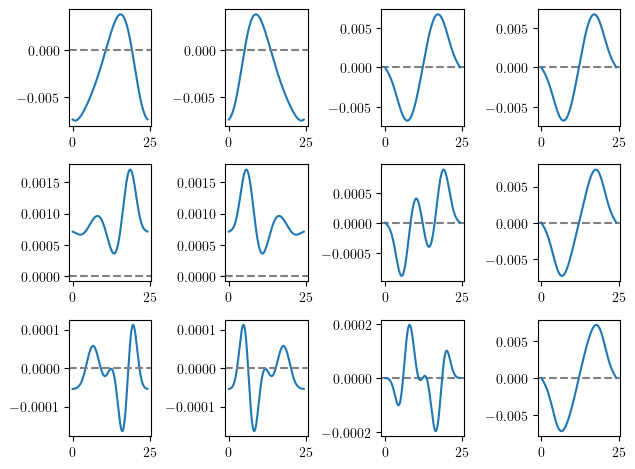

In [11]:
aa = a11_p0
fig,axs = plt.subplots(aa.system1.miter,4)
etemp = .05
h = 0
for k in range(aa.system1.miter):
    axs[k,0].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
    axs[k,1].plot(aa.x,etemp**(k+1)*aa.system2.h['lam'][k](aa.x))
    
    axs[k,0].axhline(0,color='gray',ls='--')
    axs[k,1].axhline(0,color='gray',ls='--')
    axs[k,2].axhline(0,color='gray',ls='--')
    axs[k,3].axhline(0,color='gray',ls='--')

    d = aa.system1.h['lam'][k](aa.x)-aa.system2.h['lam'][k](aa.x)
    axs[k,2].plot(aa.x,etemp**(k+1)*d)
    h += etemp**(k+1)*d
    axs[k,3].plot(aa.x,h)

plt.tight_layout()

## Get Branches Full

In [12]:
kw_p0 = {'a':a11_p0,'del1':del11_p0,'recompute':False,
        'bifdir':'bif1d_gw2/','_full_rhs':_full,'prominence':.01}

In [13]:
data_p0_list = []

In [14]:
in_dicts_p0 = [dict(init=0,eps_init=0.02,eps_final=0.11,deps=.01),
               dict(init=0,eps_init=0.02,eps_final=0.0005,deps=-.001)]

In [15]:
for i in range(len(in_dicts_p0)):
    in1 = in_dicts_p0[i]
    dat = follow_phase_diffs(**in1,**kw_p0)
    data_p0_list.append(dat)

fname1 td_branch_init=0_nm=11_del=0_ei=0.02_ef=0.11_de=0.01.txt
fname2 ts_branch_init=0_nm=11_del=0_ei=0.02_ef=0.11_de=0.01.txt
fname1 td_branch_init=0_nm=11_del=0_ei=0.02_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=0_nm=11_del=0_ei=0.02_ef=0.0005_de=-0.001.txt


In [16]:
# save hyperparameters
fname = kw_p0['bifdir']+'hyper_gw2_11_p0.txt'
hyp_inputs = np.zeros([len(in_dicts_p0),4])
for i in range(len(in_dicts_p0)):
    hyp_inputs[i,0] = in_dicts_p0[i]['init']
    hyp_inputs[i,1] = in_dicts_p0[i]['eps_init']
    hyp_inputs[i,2] = in_dicts_p0[i]['eps_final']
    hyp_inputs[i,3] = in_dicts_p0[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [17]:
data_list_r3d = []

In [18]:
kw_follow_r3d = {'a':a11_p0,'rhs':_redu_3dc,'recompute':False,
                 'bifdir':'bif1d_gw2/'}

In [19]:
data_list_r3d = []

In [20]:
in_dicts_r3d = [dict(init=0,eps_tup=(.05,.11,.01)),
                dict(init=0,eps_tup=(.05,.001,-.001))]

In [21]:
for i in range(len(in_dicts_r3d)):
    in1 = in_dicts_r3d[i]
    dat = follow_locking_3d(**in1,**kw_follow_r3d)
    data_list_r3d.append(dat)
fname = kw_follow_r3d['bifdir']+'hyper_r3d_gw2_11_p0.txt'

eps_tup (0.05, 0.11, 0.01)
eps_tup (0.05, 0.001, -0.001)


In [22]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts_r3d),4])
for i in range(len(in_dicts_r3d)):
    hyp_inputs[i,0] = in_dicts_r3d[i]['init']
    hyp_inputs[i,1] = in_dicts_r3d[i]['eps_tup'][0]
    hyp_inputs[i,2] = in_dicts_r3d[i]['eps_tup'][1]
    hyp_inputs[i,3] = in_dicts_r3d[i]['eps_tup'][2]
np.savetxt(fname,hyp_inputs)

## Plot

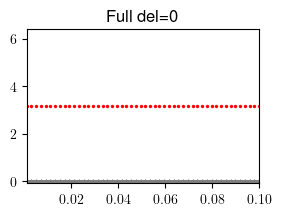

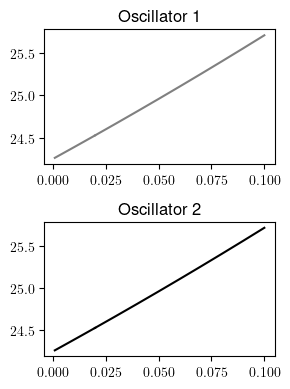

In [23]:
quick_plot_combined(a11_p0,
                    kw_f={'data_list':data_p0_list},
                    # kw_r3d={'data_list':data_list_r3d},
                    kw_r={'etup':etup11})

## Sims

In [24]:
# coupling and init
eps11_p0 = 0.1
th_init11_p0 = 2

In [25]:
# sim params
dt = .01;T_p0=1000
t11_p0 = np.arange(0,T_p0,dt)
args11_p0 = {'args':(a11_p0,eps11_p0,del11_p0),
             't_eval':t11_p0,**kw_sim,'dense_output':True}

In [26]:
th_init11_p0/(2*np.pi)

0.3183098861837907

In [27]:
# initialize and run full
y0a = a11_p0.system1.lc['dat'][int((th_init11_p0/(2*np.pi)) * a11_p0.system1.TN),:]
y0b = a11_p0.system2.lc['dat'][0,:]

y0_p0 = np.array([y0a,y0b]).flatten()

solf11_p0 = solve_ivp(_full,[0,t11_p0[-1]],y0_p0, **args11_p0)

In [28]:
solr11_p0 = solve_ivp(_redu_c,[0,t11_p0[-1]],[th_init11_p0],**args11_p0)

In [29]:
tp12a_p0, phase12a_p0 = get_phase(t11_p0,solf11_p0.y.T[:,:4],
                            skipn=50,system1=a11_p0.system1)
tp12b_p0, phase12b_p0 = get_phase(t11_p0,solf11_p0.y.T[:,4:],
                            skipn=50,system1=a11_p0.system2)

(-0.5, 6.783185307179586)

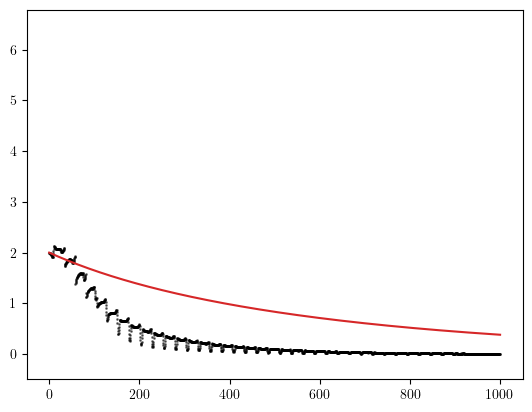

In [30]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p0 - a11_p0.om*phase12b_p0,2*np.pi)
axs.scatter(tp12a_p0,y,s=1,alpha=.5,color='black')

axs.plot(t11_p0,np.mod(solr11_p0.y.T,2*np.pi),color='tab:red')

axs.set_ylim(-.5,2*np.pi+.5)

# del=0.01

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
p fname ./data/hom2_gw0/p_data_ord=0_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.01.txt
p order=0
p fname ./data/hom2_gw1/p_data_ord=0_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.01.txt
p order=0
p fname ./data/hom2_gw0/p_data_ord=1_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.01.txt
p order=1
del values 0.0025 0.0


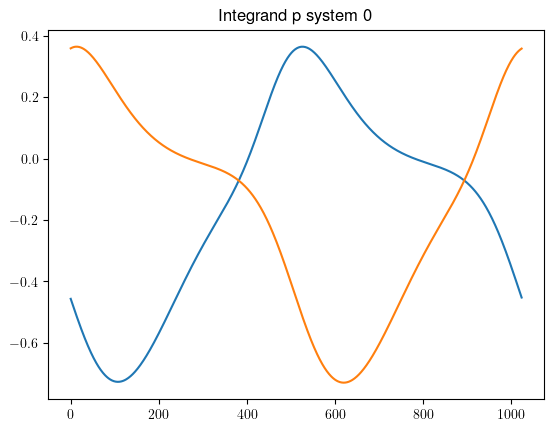

p fname ./data/hom2_gw1/p_data_ord=1_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.01.txt
p order=1
del values 0.0025 0.0


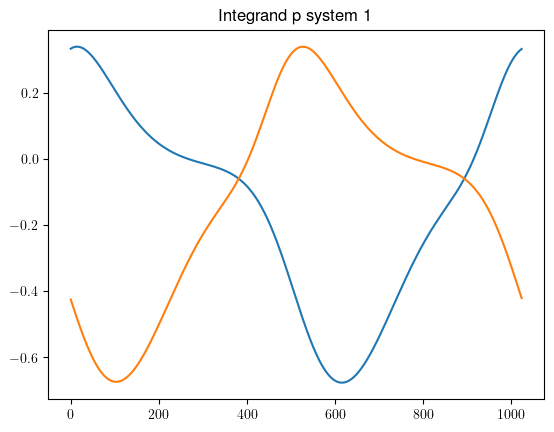

p fname ./data/hom2_gw0/p_data_ord=2_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.01.txt
p order=2
del values 0.0025 0.0


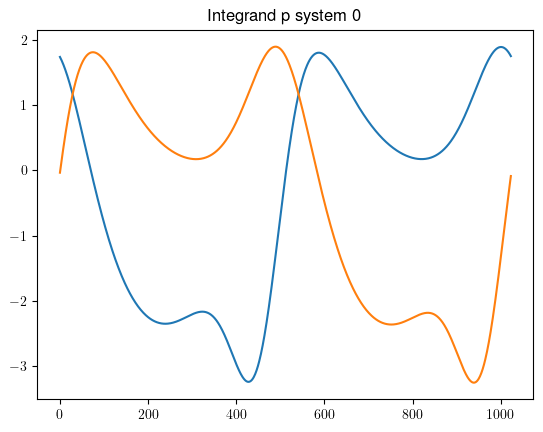

p fname ./data/hom2_gw1/p_data_ord=2_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.01.txt
p order=2
del values 0.0025 0.0


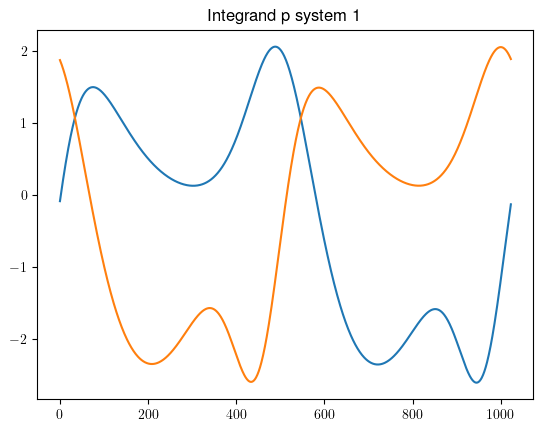

* Loading H symbolic...
* Loading H symbolic...
* Computing H hom2_gw0, order=0...


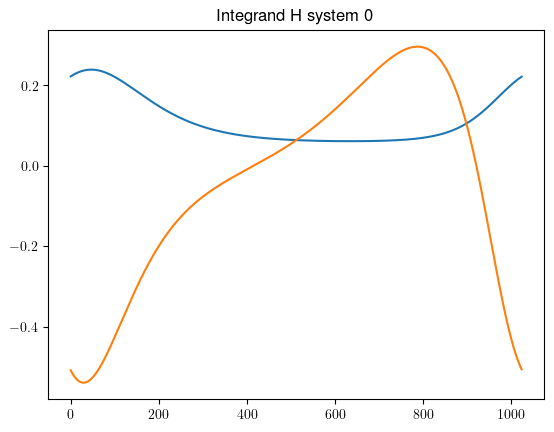

* Computing H hom2_gw1, order=0...


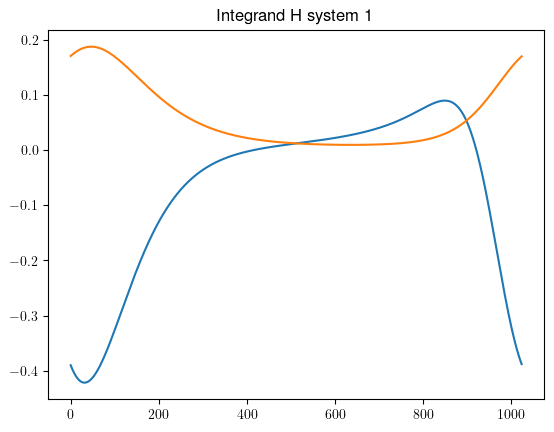

* Computing H hom2_gw0, order=1...


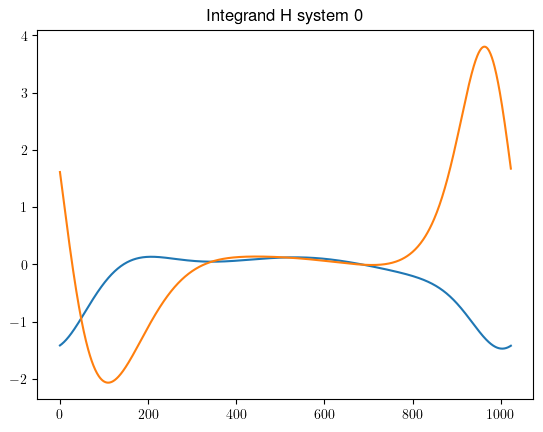

* Computing H hom2_gw1, order=1...


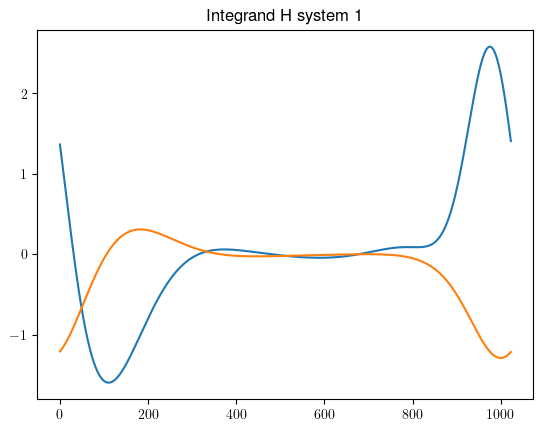

* Computing H hom2_gw0, order=2...


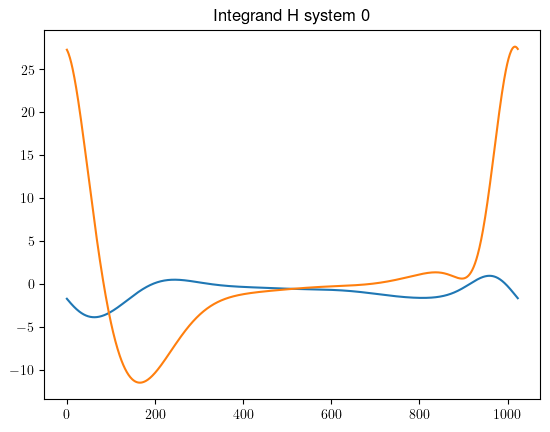

* Computing H hom2_gw1, order=2...


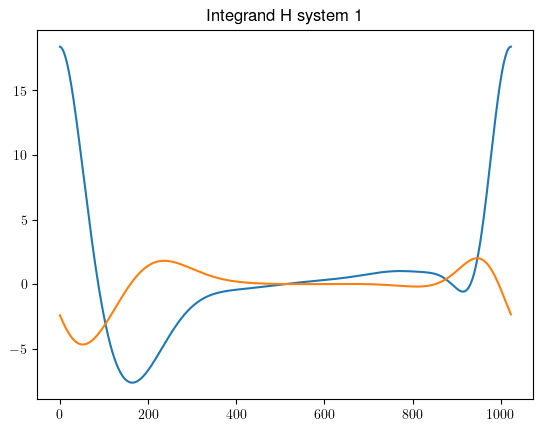

In [31]:
del11_p01 = 0.01
a11_p01 = nm.nmCoupling(**kw_nm,load_all=True, del1=del11_p01)

## H functions

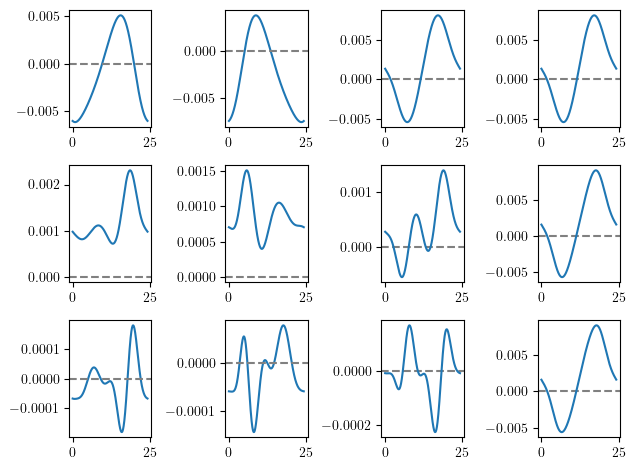

In [32]:
aa = a11_p01
fig,axs = plt.subplots(aa.system1.miter,4)
etemp = .05
h = 0
for k in range(aa.system1.miter):
    axs[k,0].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
    axs[k,1].plot(aa.x,etemp**(k+1)*aa.system2.h['lam'][k](aa.x))
    
    axs[k,0].axhline(0,color='gray',ls='--')
    axs[k,1].axhline(0,color='gray',ls='--')
    axs[k,2].axhline(0,color='gray',ls='--')
    axs[k,3].axhline(0,color='gray',ls='--')

    d = aa.system1.h['lam'][k](aa.x)-aa.system2.h['lam'][k](aa.x)
    axs[k,2].plot(aa.x,etemp**(k+1)*d)
    h += etemp**(k+1)*d
    axs[k,3].plot(aa.x,h)

plt.tight_layout()

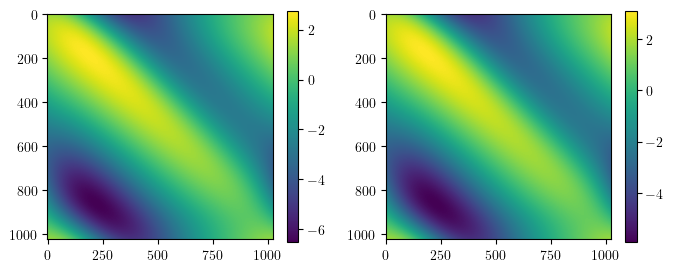

In [33]:
fig,axs = plt.subplots(1,2,figsize=(8,3))
im1 = axs[0].imshow(a11_p01.system1.p['dat'][1])
plt.colorbar(im1,ax=axs[0])
im2 = axs[1].imshow(a11_p01.system2.p['dat'][1].T)
plt.colorbar(im2,ax=axs[1])

## Get Branches Full

In [34]:
kw_p01 = {'a':a11_p01,'del1':del11_p01,'recompute':False,
          'bifdir':'bif1d_gw2/','_full_rhs':_full,'prominence':.01,
         'max_time':1000}

In [35]:
data_p01_list = []

In [36]:
in_dicts_p01 = [dict(init=.5,eps_init=0.02,eps_final=0.11,deps=.01),
                dict(init=.5,eps_init=0.02,eps_final=0.0005,deps=-.001)]

In [37]:
for i in range(len(in_dicts_p01)):
    in1 = in_dicts_p01[i]
    dat = follow_phase_diffs(**in1,**kw_p01)
    data_p01_list.append(dat)

fname1 td_branch_init=0.5_nm=11_del=0.01_ei=0.02_ef=0.11_de=0.01.txt
fname2 ts_branch_init=0.5_nm=11_del=0.01_ei=0.02_ef=0.11_de=0.01.txt
fname1 td_branch_init=0.5_nm=11_del=0.01_ei=0.02_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=0.5_nm=11_del=0.01_ei=0.02_ef=0.0005_de=-0.001.txt


In [38]:
# save hyperparameters
fname = kw_p01['bifdir']+'hyper_gw2_11_p01.txt'
hyp_inputs = np.zeros([len(in_dicts_p01),4])
for i in range(len(in_dicts_p01)):
    hyp_inputs[i,0] = in_dicts_p01[i]['init']
    hyp_inputs[i,1] = in_dicts_p01[i]['eps_init']
    hyp_inputs[i,2] = in_dicts_p01[i]['eps_final']
    hyp_inputs[i,3] = in_dicts_p01[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [39]:
data_list_r3d = []

In [40]:
kw_follow_r3d = {'a':a11_p01,'rhs':_redu_3dc,'recompute':False,
                 'bifdir':'bif1d_gw2/'}

In [41]:
in_dicts_r3d = [dict(init=.5,eps_tup=(.05,.11,.01)),
                dict(init=.5,eps_tup=(.05,.001,-.001)),
                dict(init=.5,eps_tup=(.11,.21,.01))]

In [42]:
for i in range(len(in_dicts_r3d)):
    in1 = in_dicts_r3d[i]
    dat = follow_locking_3d(**in1,**kw_follow_r3d)
    data_list_r3d.append(dat)
fname = kw_follow_r3d['bifdir']+'hyper_r3d_gw2_11_p01.txt'

eps_tup (0.05, 0.11, 0.01)
eps_tup (0.05, 0.001, -0.001)
eps_tup (0.11, 0.21, 0.01)


In [43]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts_r3d),4])
for i in range(len(in_dicts_r3d)):
    hyp_inputs[i,0] = in_dicts_r3d[i]['init']
    hyp_inputs[i,1] = in_dicts_r3d[i]['eps_tup'][0]
    hyp_inputs[i,2] = in_dicts_r3d[i]['eps_tup'][1]
    hyp_inputs[i,3] = in_dicts_r3d[i]['eps_tup'][2]
np.savetxt(fname,hyp_inputs)

## Plot

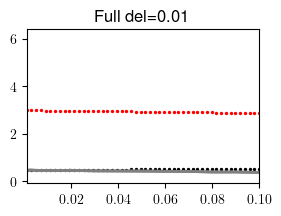

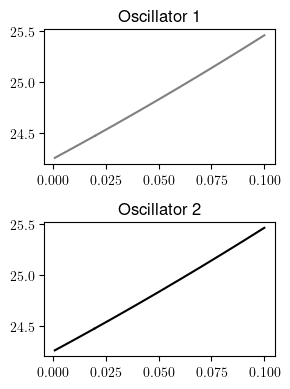

In [44]:
quick_plot_combined(a11_p01,
                    kw_f={'data_list':data_p01_list},
                    # kw_r3d={'data_list':data_list_r3d},
                    kw_r={'etup':etup11})

## Sims

In [45]:
# coupling and init
eps11_p01 = 0.15
th_init11_p01 = 2

In [46]:
# sim params
dt = .01;T_p01=1000
t11_p01 = np.arange(0,T_p01,dt)
args11_p01 = {'args':(a11_p01,eps11_p01,del11_p01),
             't_eval':t11_p01,**kw_sim,'dense_output':True}

In [47]:
# initialize and run full
y0a = a11_p01.system1.lc['dat'][int((th_init11_p01/(2*np.pi)) * a11_p01.system1.TN),:]
y0b = a11_p01.system2.lc['dat'][int((0/(2*np.pi)) * a11_p01.system2.TN),:]

y0_p01 = np.array([y0a,y0b]).flatten()

solf11_p01 = solve_ivp(_full,[0,t11_p01[-1]],y0_p01, **args11_p01)

In [48]:
solr11_p01 = solve_ivp(_redu_c,[0,t11_p01[-1]],[th_init11_p01],**args11_p01)

In [49]:
tp12a_p01, phase12a_p01 = get_phase(t11_p01,solf11_p01.y.T[:,:4],
                            skipn=50,system1=a11_p01.system1)
tp12b_p01, phase12b_p01 = get_phase(t11_p01,solf11_p01.y.T[:,4:],
                            skipn=50,system1=a11_p01.system2)

(-0.5, 6.783185307179586)

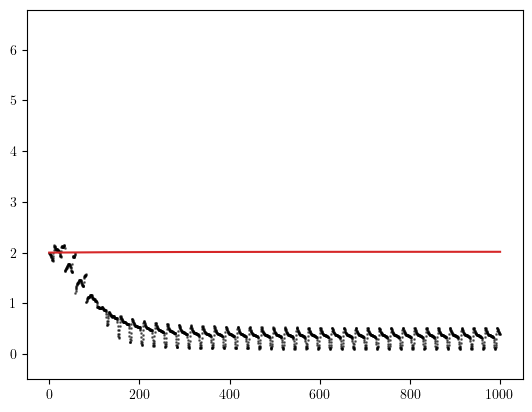

In [50]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p01 - a11_p01.om*phase12b_p01,2*np.pi)
axs.scatter(tp12a_p01,y,s=1,alpha=.5,color='black')

axs.plot(t11_p01,np.mod(solr11_p01.y.T,2*np.pi),
         color='tab:red')

axs.set_ylim(-.5,2*np.pi+.5)

# del=0.03

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
p fname ./data/hom2_gw0/p_data_ord=0_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.03.txt
p order=0
p fname ./data/hom2_gw1/p_data_ord=0_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.03.txt
p order=0
p fname ./data/hom2_gw0/p_data_ord=1_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.03.txt
p order=1
del values 0.0075 0.0


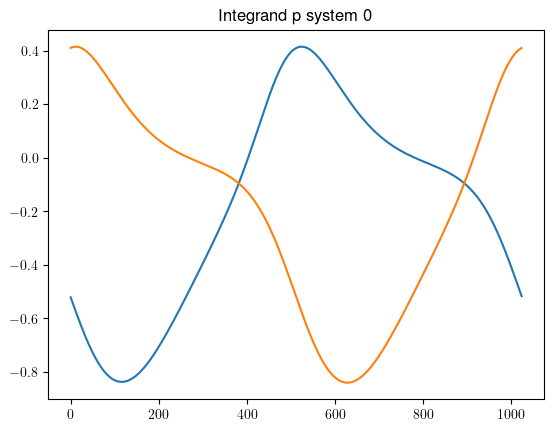

p fname ./data/hom2_gw1/p_data_ord=1_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.03.txt
p order=1
del values 0.0075 0.0


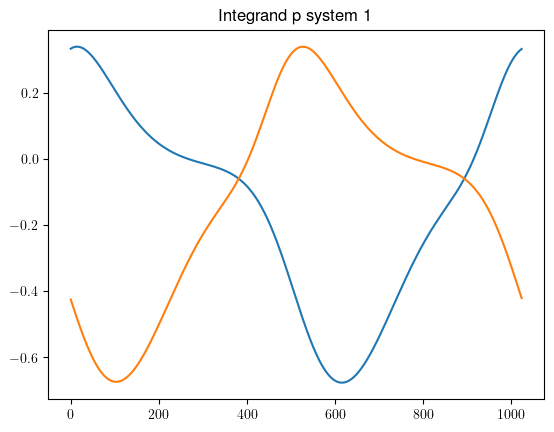

p fname ./data/hom2_gw0/p_data_ord=2_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.03.txt
p order=2
del values 0.0075 0.0


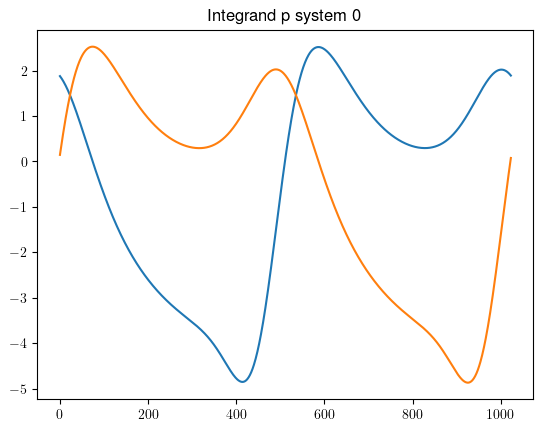

p fname ./data/hom2_gw1/p_data_ord=2_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.03.txt
p order=2
del values 0.0075 0.0


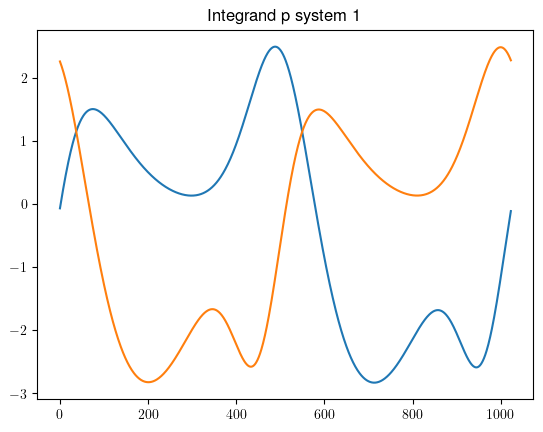

* Loading H symbolic...
* Loading H symbolic...
* Computing H hom2_gw0, order=0...


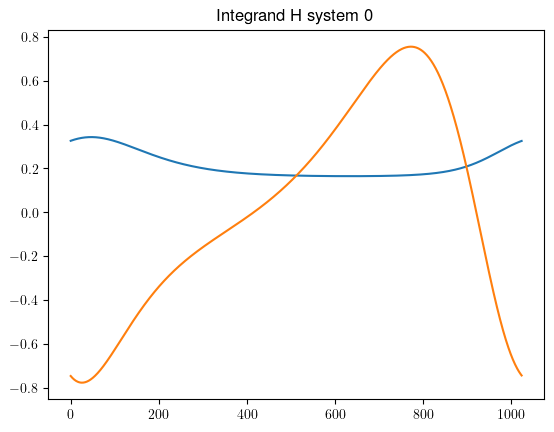

* Computing H hom2_gw1, order=0...


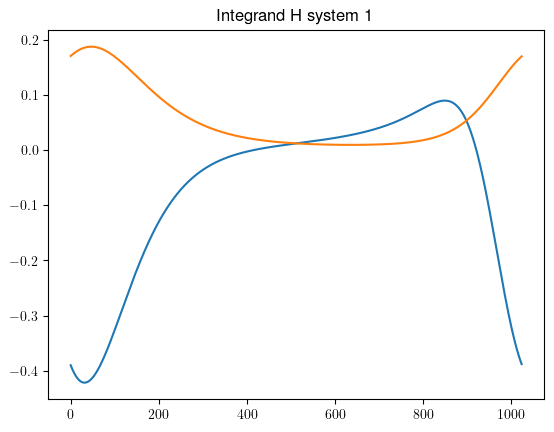

* Computing H hom2_gw0, order=1...


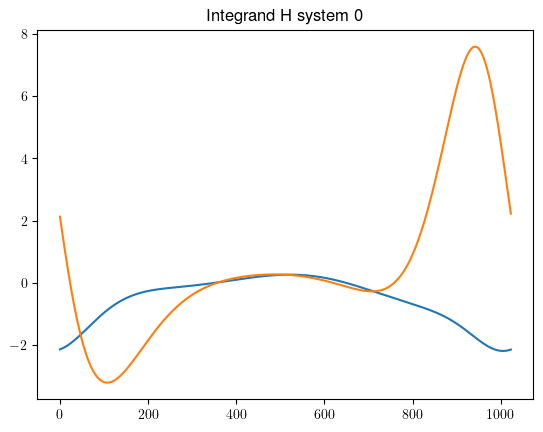

* Computing H hom2_gw1, order=1...


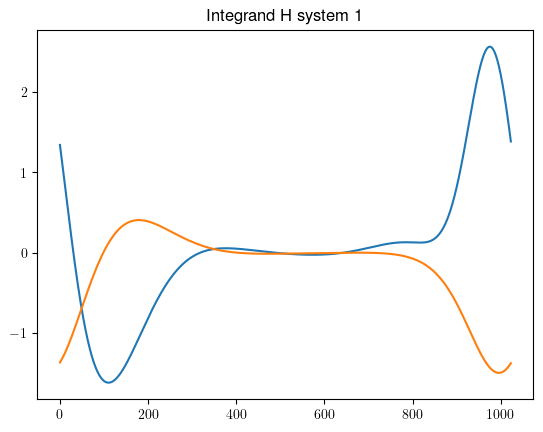

* Computing H hom2_gw0, order=2...


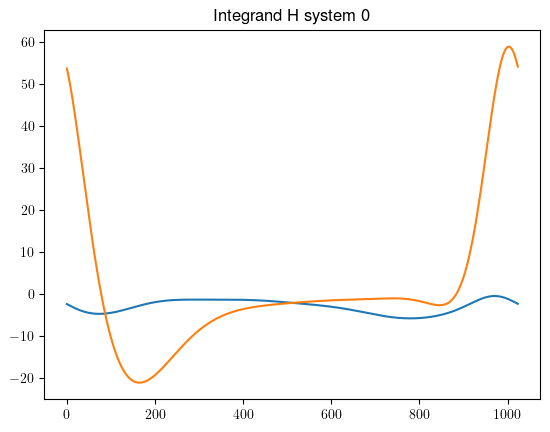

* Computing H hom2_gw1, order=2...


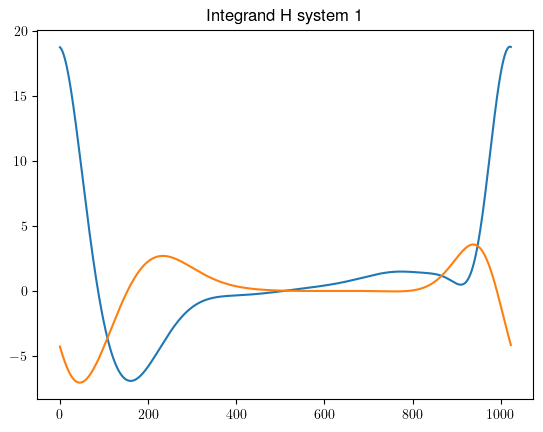

In [51]:
del11_p03 = 0.03
a11_p03 = nm.nmCoupling(**kw_nm, del1=del11_p03)

## H functions

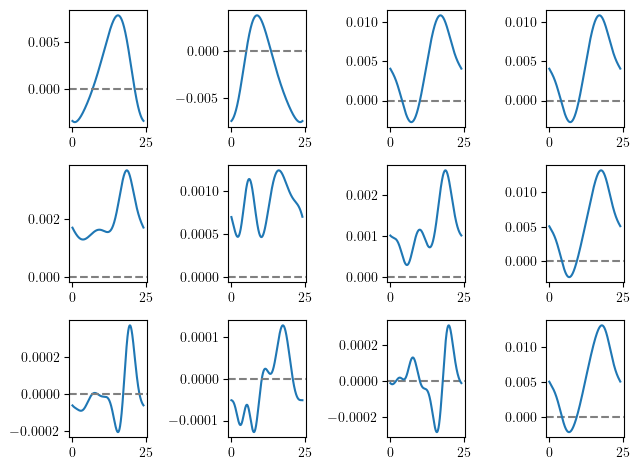

In [52]:
aa = a11_p03
fig,axs = plt.subplots(aa.system1.miter,4)
etemp = .05
h = 0
for k in range(aa.system1.miter):
    axs[k,0].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
    axs[k,1].plot(aa.x,etemp**(k+1)*aa.system2.h['lam'][k](aa.x))
    
    axs[k,0].axhline(0,color='gray',ls='--')
    axs[k,1].axhline(0,color='gray',ls='--')
    axs[k,2].axhline(0,color='gray',ls='--')
    axs[k,3].axhline(0,color='gray',ls='--')

    d = aa.system1.h['lam'][k](aa.x)-aa.system2.h['lam'][k](aa.x)
    axs[k,2].plot(aa.x,etemp**(k+1)*d)
    h += etemp**(k+1)*d
    axs[k,3].plot(aa.x,h)

plt.tight_layout()

## Get Branches Full

In [53]:
kw_p03 = {'a':a11_p03,'del1':del11_p03,'recompute':False,
        'bifdir':'bif1d_gw2/','_full_rhs':_full}

In [54]:
data_p03_list = []

In [55]:
in_dicts_p03 = [dict(init=.5,eps_init=0.02,eps_final=0.11,deps=.01),
                dict(init=.5,eps_init=0.02,eps_final=0.0005,deps=-.001)]

In [56]:
for i in range(len(in_dicts_p03)):
    in1 = in_dicts_p03[i]
    dat = follow_phase_diffs(**in1,**kw_p03)
    data_p03_list.append(dat)

fname1 td_branch_init=0.5_nm=11_del=0.03_ei=0.02_ef=0.11_de=0.01.txt
fname2 ts_branch_init=0.5_nm=11_del=0.03_ei=0.02_ef=0.11_de=0.01.txt
fname1 td_branch_init=0.5_nm=11_del=0.03_ei=0.02_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=0.5_nm=11_del=0.03_ei=0.02_ef=0.0005_de=-0.001.txt


In [57]:
# save hyperparameters
fname = kw_p03['bifdir']+'hyper_gw2_11_p03.txt'
hyp_inputs = np.zeros([len(in_dicts_p03),4])
for i in range(len(in_dicts_p03)):
    hyp_inputs[i,0] = in_dicts_p03[i]['init']
    hyp_inputs[i,1] = in_dicts_p03[i]['eps_init']
    hyp_inputs[i,2] = in_dicts_p03[i]['eps_final']
    hyp_inputs[i,3] = in_dicts_p03[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [58]:
data_list_r3d = []

In [59]:
kw_follow_r3d = {'a':a11_p03,'rhs':_redu_3dc,'recompute':False,
                 'bifdir':'bif1d_gw2/'}

In [60]:
data_list_r3d = []

In [61]:
in_dicts_r3d = [dict(init=.5,eps_tup=(.05,.11,.01)),
                dict(init=.5,eps_tup=(.05,.001,-.001))]

In [62]:
for i in range(len(in_dicts_r3d)):
    in1 = in_dicts_r3d[i]
    dat = follow_locking_3d(**in1,**kw_follow_r3d)
    data_list_r3d.append(dat)
fname = kw_follow_r3d['bifdir']+'hyper_r3d_gw2_11_p03.txt'

eps_tup (0.05, 0.11, 0.01)
eps_tup (0.05, 0.001, -0.001)


In [63]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts_r3d),4])
for i in range(len(in_dicts_r3d)):
    hyp_inputs[i,0] = in_dicts_r3d[i]['init']
    hyp_inputs[i,1] = in_dicts_r3d[i]['eps_tup'][0]
    hyp_inputs[i,2] = in_dicts_r3d[i]['eps_tup'][1]
    hyp_inputs[i,3] = in_dicts_r3d[i]['eps_tup'][2]
np.savetxt(fname,hyp_inputs)

## Plot

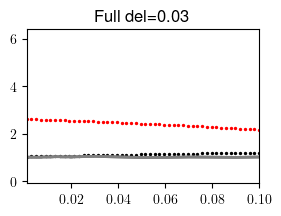

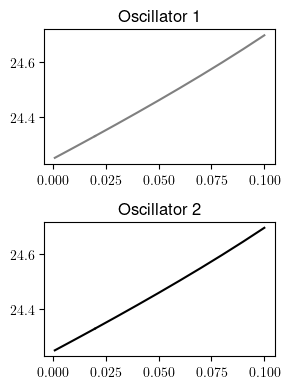

In [64]:
quick_plot_combined(a11_p03,
                    kw_f={'data_list':data_p03_list},
                    # kw_r3d={'data_list':data_list_r3d},
                    kw_r={'etup':etup11})

# del=0.04

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
p fname ./data/hom2_gw0/p_data_ord=0_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.04.txt
p order=0
p fname ./data/hom2_gw1/p_data_ord=0_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.04.txt
p order=0
p fname ./data/hom2_gw0/p_data_ord=1_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.04.txt
p order=1
del values 0.01 0.0


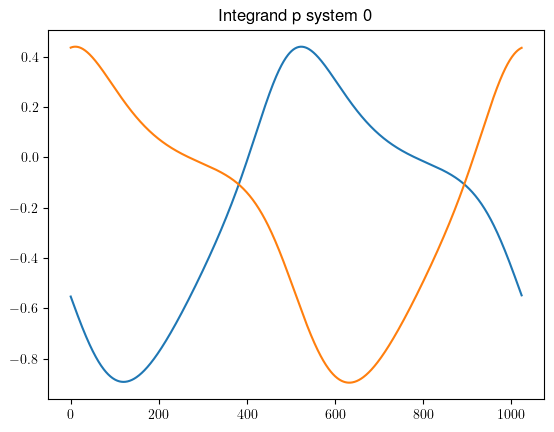

p fname ./data/hom2_gw1/p_data_ord=1_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.04.txt
p order=1
del values 0.01 0.0


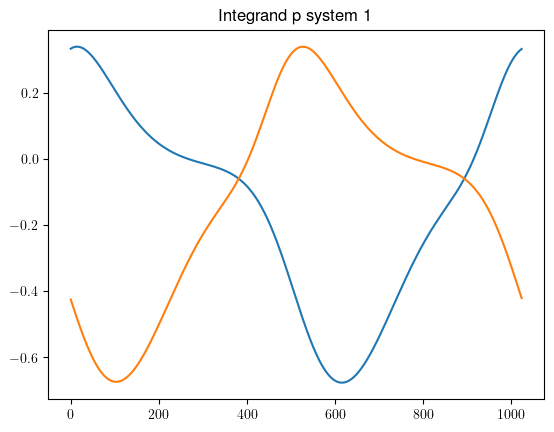

p fname ./data/hom2_gw0/p_data_ord=2_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.04.txt
p order=2
del values 0.01 0.0


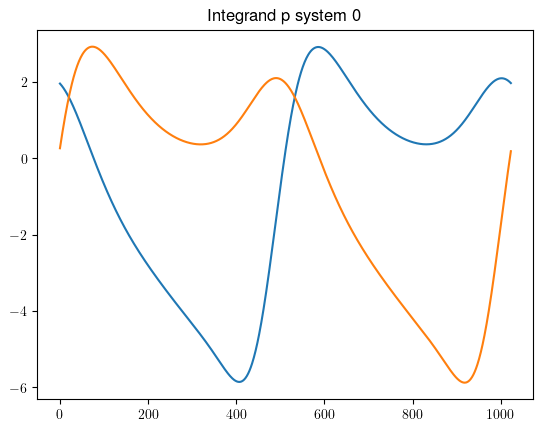

p fname ./data/hom2_gw1/p_data_ord=2_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.04.txt
p order=2
del values 0.01 0.0


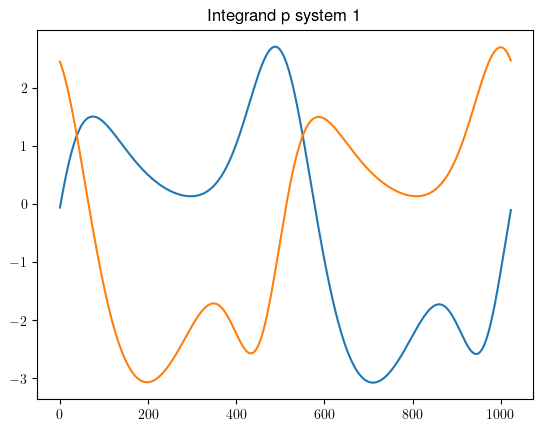

* Loading H symbolic...
* Loading H symbolic...
* Computing H hom2_gw0, order=0...


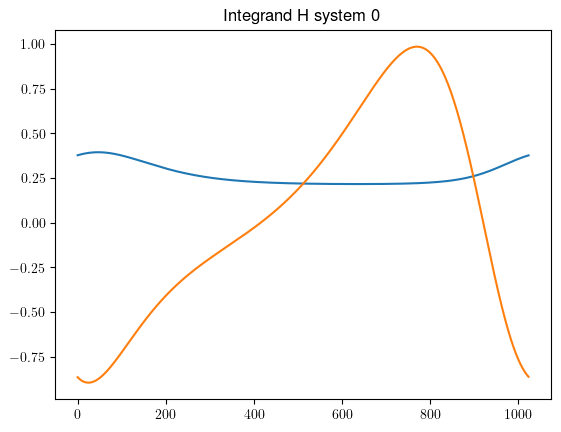

* Computing H hom2_gw1, order=0...


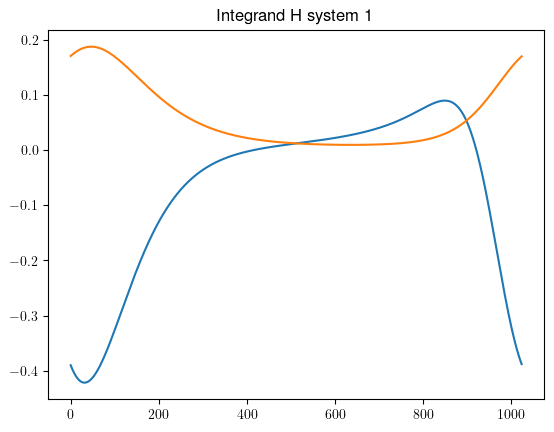

* Computing H hom2_gw0, order=1...


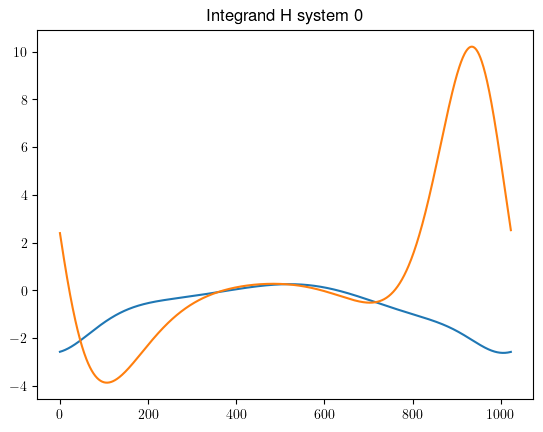

* Computing H hom2_gw1, order=1...


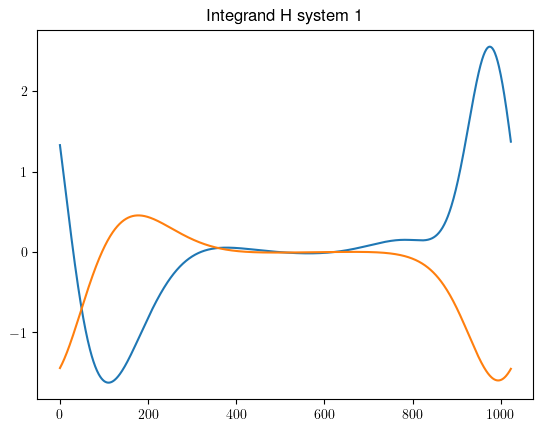

* Computing H hom2_gw0, order=2...


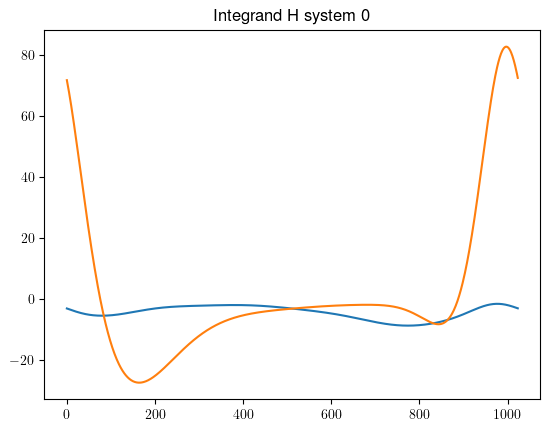

* Computing H hom2_gw1, order=2...


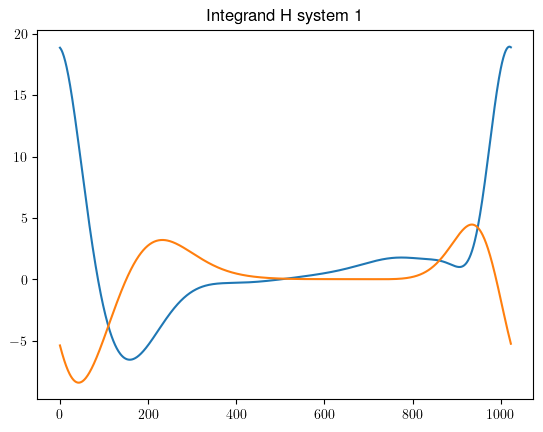

In [65]:
del11_p04 = 0.04
a11_p04 = nm.nmCoupling(**kw_nm, del1=del11_p04)

## H functions

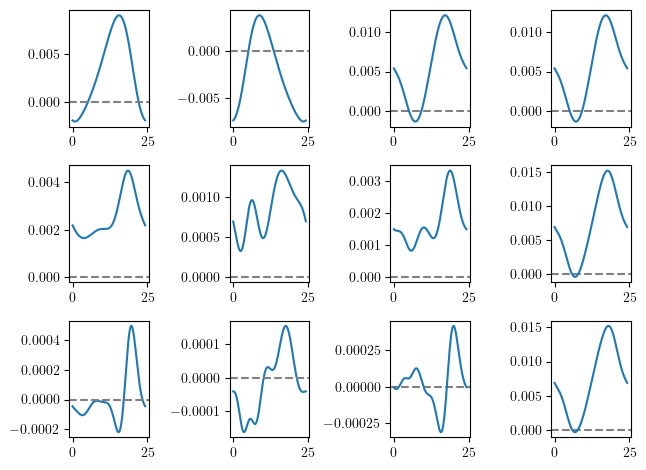

In [66]:
aa = a11_p04
fig,axs = plt.subplots(aa.system1.miter,4)
etemp = .05
h = 0
for k in range(aa.system1.miter):
    axs[k,0].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
    axs[k,1].plot(aa.x,etemp**(k+1)*aa.system2.h['lam'][k](aa.x))
    
    axs[k,0].axhline(0,color='gray',ls='--')
    axs[k,1].axhline(0,color='gray',ls='--')
    axs[k,2].axhline(0,color='gray',ls='--')
    axs[k,3].axhline(0,color='gray',ls='--')

    d = aa.system1.h['lam'][k](aa.x)-aa.system2.h['lam'][k](aa.x)
    axs[k,2].plot(aa.x,etemp**(k+1)*d)
    h += etemp**(k+1)*d
    axs[k,3].plot(aa.x,h)

plt.tight_layout()

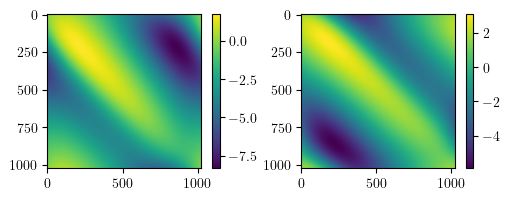

In [67]:
# compare p_1 oscillator 1 here in 11 to p_1 oscillator 0 in 11.
X,Y = np.meshgrid(a11_p04.x,a11_p04.x)
fig,axs = plt.subplots(1,2,figsize=(6,2))
cs1 = axs[0].imshow(a11_p04.system1.p['lam'][1](X,Y))
cs2 = axs[1].imshow(a11_p04.system2.p['lam'][1](X,Y))
cbar = fig.colorbar(cs1)
cbar = fig.colorbar(cs2)

## Get Branches Full

In [68]:
kw_p04 = {'a':a11_p04,'del1':del11_p04,'recompute':False,
        'bifdir':'bif1d_gw2/','_full_rhs':_full}

In [69]:
data_p04_list = []

In [70]:
in_dicts_p04 = [dict(init=.5,eps_init=0.02,eps_final=0.09,deps=.01),
                dict(init=.5,eps_init=0.02,eps_final=0.0005,deps=-.001)]

In [71]:
for i in range(len(in_dicts_p04)):
    in1 = in_dicts_p04[i]
    dat = follow_phase_diffs(**in1,**kw_p04)
    data_p04_list.append(dat)

fname1 td_branch_init=0.5_nm=11_del=0.04_ei=0.02_ef=0.09_de=0.01.txt
fname2 ts_branch_init=0.5_nm=11_del=0.04_ei=0.02_ef=0.09_de=0.01.txt
fname1 td_branch_init=0.5_nm=11_del=0.04_ei=0.02_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=0.5_nm=11_del=0.04_ei=0.02_ef=0.0005_de=-0.001.txt


In [72]:
# save hyperparameters
fname = kw_p04['bifdir']+'hyper_gw2_11_p04.txt'
hyp_inputs = np.zeros([len(in_dicts_p04),4])
for i in range(len(in_dicts_p04)):
    hyp_inputs[i,0] = in_dicts_p04[i]['init']
    hyp_inputs[i,1] = in_dicts_p04[i]['eps_init']
    hyp_inputs[i,2] = in_dicts_p04[i]['eps_final']
    hyp_inputs[i,3] = in_dicts_p04[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [73]:
kw_follow_r3d = {'a':a11_p04,'rhs':_redu_3dc,'recompute':False,
                 'bifdir':'bif1d_gw2/'}

In [74]:
data_list_r3d = []

In [75]:
in_dicts_r3d = [dict(init=.5,eps_tup=(.05,.075,.005)),
                dict(init=.5,eps_tup=(.05,.001,-.001))]

In [76]:
for i in range(len(in_dicts_r3d)):
    in1 = in_dicts_r3d[i]
    dat = follow_locking_3d(**in1,**kw_follow_r3d)
    data_list_r3d.append(dat)
fname = kw_follow_r3d['bifdir']+'hyper_r3d_gw2_11_p04.txt'

eps_tup (0.05, 0.075, 0.005)
eps_tup (0.05, 0.001, -0.001)


In [77]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts_r3d),4])
for i in range(len(in_dicts_r3d)):
    hyp_inputs[i,0] = in_dicts_r3d[i]['init']
    hyp_inputs[i,1] = in_dicts_r3d[i]['eps_tup'][0]
    hyp_inputs[i,2] = in_dicts_r3d[i]['eps_tup'][1]
    hyp_inputs[i,3] = in_dicts_r3d[i]['eps_tup'][2]
np.savetxt(fname,hyp_inputs)

## Plot

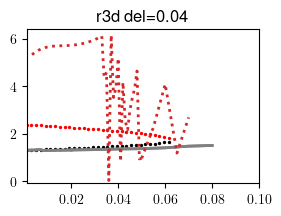

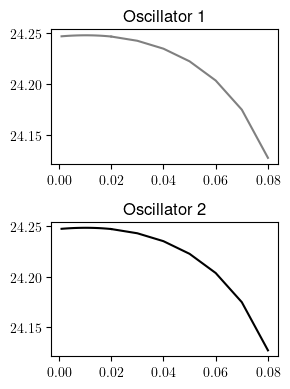

In [78]:
quick_plot_combined(a11_p04,
                    kw_f={'data_list':data_p04_list},
                    kw_r3d={'data_list':data_list_r3d},
                    kw_r={'etup':etup11})

## Sims

In [79]:
# coupling and init
eps11_p04 = 0.1
th_init11_p04 = 2

In [80]:
# sim params
dt = .01;T_p04=1000
t11_p04 = np.arange(0,T_p04,dt)
args11_p04 = {'args':(a11_p04,eps11_p04,del11_p04),
             't_eval':t11_p04,**kw_sim,'dense_output':True}

In [81]:
# initialize and run full
y0a = a11_p04.system1.lc['dat'][int((th_init11_p04/(2*np.pi)) * a11_p04.system1.TN),:]
y0b = a11_p04.system2.lc['dat'][int((0/(2*np.pi)) * a11_p04.system2.TN),:]

y0_p04 = np.array([y0a,y0b]).flatten()

solf11_p04 = solve_ivp(_full,[0,t11_p04[-1]],y0_p04, **args11_p04)

In [82]:
solr11_p04 = solve_ivp(_redu_c,[0,t11_p04[-1]],[th_init11_p04],**args11_p04)

In [83]:
# solr12b_p04 = solve_ivp(_redu_3dc,[0,t11_p04[-1]],
#                     [th_init11_p04,0,0],**args11_p04)

In [84]:
tp12a_p04, phase12a_p04 = get_phase(t11_p04,solf11_p04.y.T[:,:4],
                            skipn=50,system1=a11_p04.system1)
tp12b_p04, phase12b_p04 = get_phase(t11_p04,solf11_p04.y.T[:,4:],
                            skipn=50,system1=a11_p04.system2)

(-0.5, 6.783185307179586)

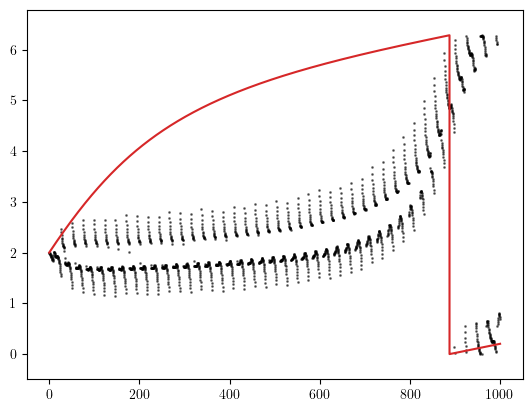

In [85]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p04 - a11_p04.om*phase12b_p04,2*np.pi)
axs.scatter(tp12a_p04,y,s=1,alpha=.5,color='black')

axs.plot(t11_p04,np.mod(solr11_p04.y.T,2*np.pi),color='tab:red')

axs.set_ylim(-.5,2*np.pi+.5)

# del=0.045

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
p fname ./data/hom2_gw0/p_data_ord=0_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.045.txt
p order=0
p fname ./data/hom2_gw1/p_data_ord=0_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.045.txt
p order=0
p fname ./data/hom2_gw0/p_data_ord=1_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.045.txt
p order=1
del values 0.01125 0.0


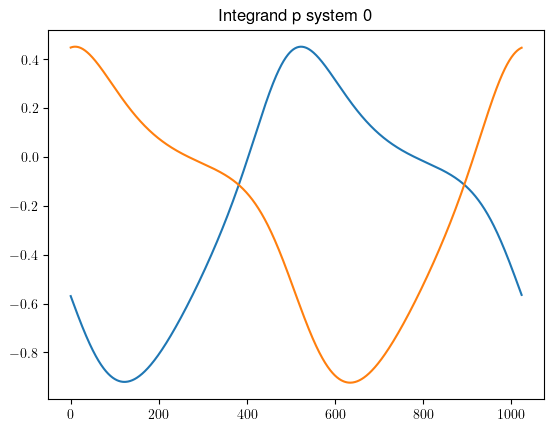

p fname ./data/hom2_gw1/p_data_ord=1_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.045.txt
p order=1
del values 0.01125 0.0


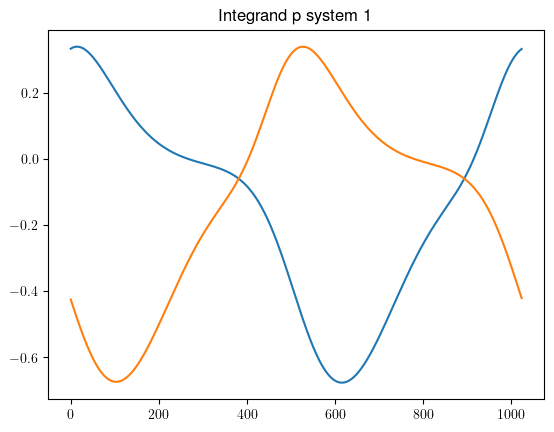

p fname ./data/hom2_gw0/p_data_ord=2_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.045.txt
p order=2
del values 0.01125 0.0


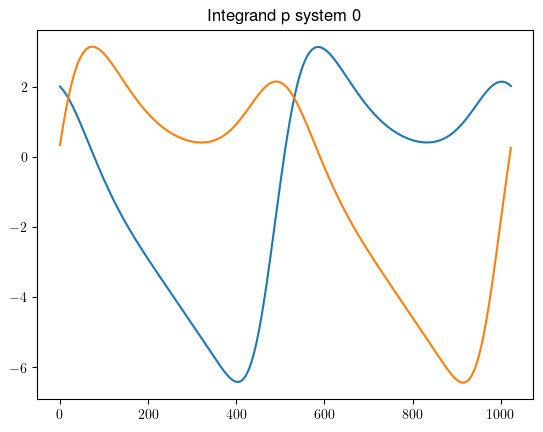

p fname ./data/hom2_gw1/p_data_ord=2_NP=1024_NH=1024_piter=4_n=1_m=1_f=False_de=0.045.txt
p order=2
del values 0.01125 0.0


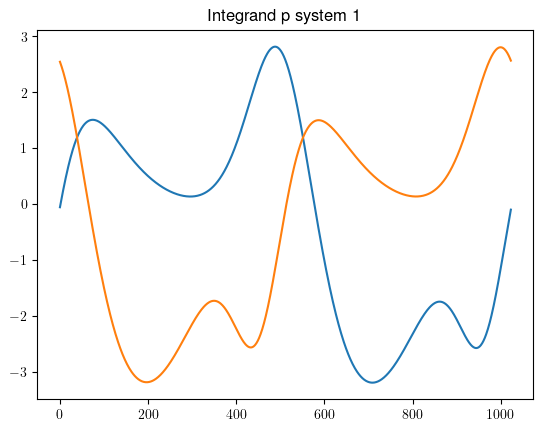

* Loading H symbolic...
* Loading H symbolic...
* Computing H hom2_gw0, order=0...


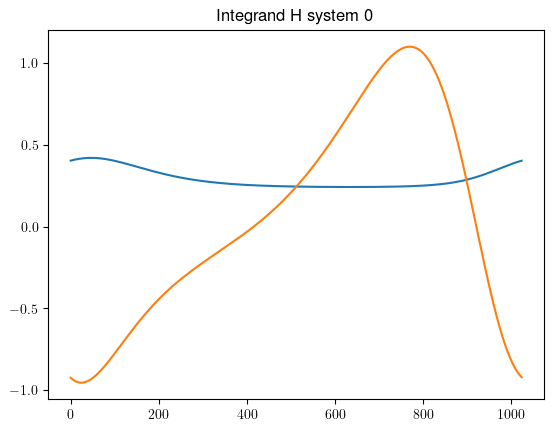

* Computing H hom2_gw1, order=0...


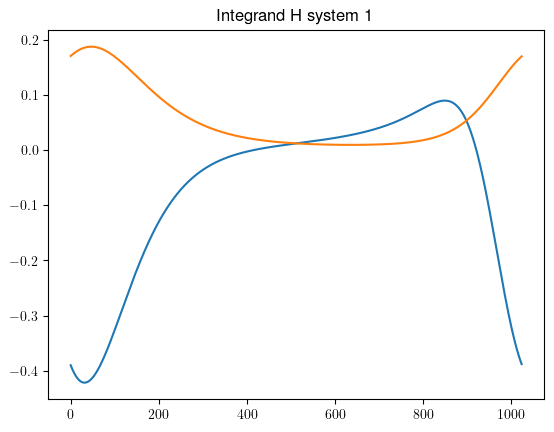

* Computing H hom2_gw0, order=1...


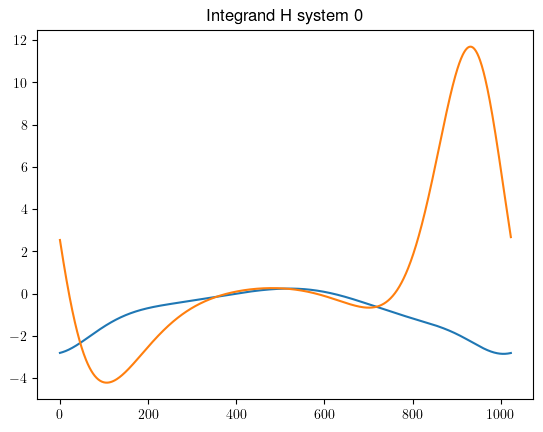

* Computing H hom2_gw1, order=1...


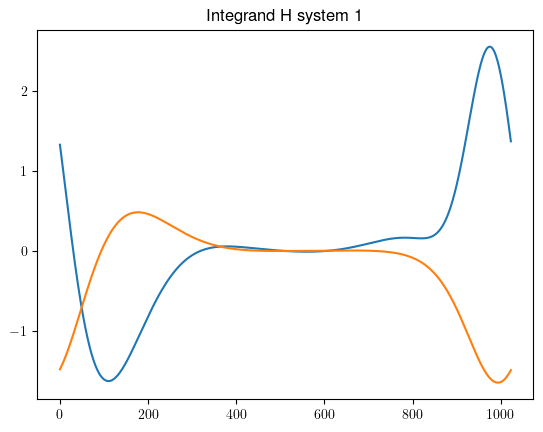

* Computing H hom2_gw0, order=2...


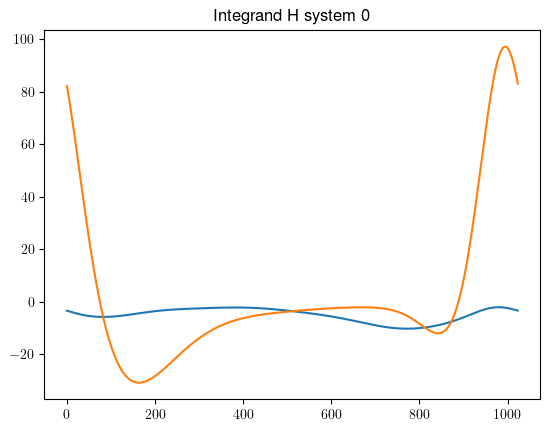

* Computing H hom2_gw1, order=2...


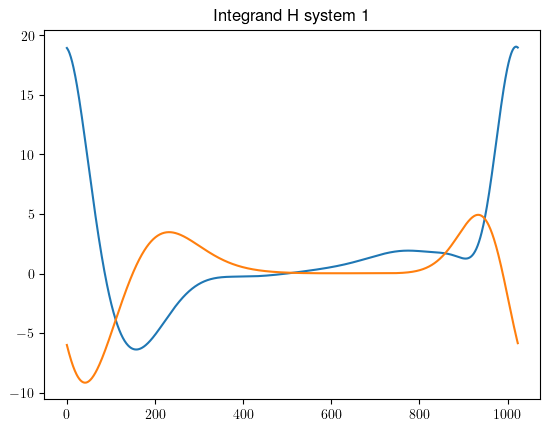

In [86]:
del11_p045 = 0.045
a11_p045 = nm.nmCoupling(**kw_nm, del1=del11_p045)

## H functions

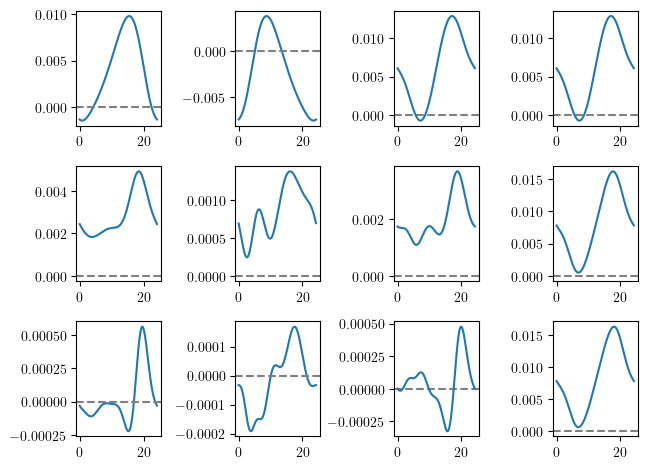

In [87]:
aa = a11_p045
fig,axs = plt.subplots(aa.system1.miter,4)
etemp = .05
h = 0
for k in range(aa.system1.miter):
    axs[k,0].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
    axs[k,1].plot(aa.x,etemp**(k+1)*aa.system2.h['lam'][k](aa.x))
    
    axs[k,0].axhline(0,color='gray',ls='--')
    axs[k,1].axhline(0,color='gray',ls='--')
    axs[k,2].axhline(0,color='gray',ls='--')
    axs[k,3].axhline(0,color='gray',ls='--')

    d = aa.system1.h['lam'][k](aa.x)-aa.system2.h['lam'][k](aa.x)
    axs[k,2].plot(aa.x,etemp**(k+1)*d)
    h += etemp**(k+1)*d
    axs[k,3].plot(aa.x,h)

plt.tight_layout()

## Get Branches Full

In [88]:
kw_p045 = {'a':a11_p045,'del1':del11_p045,'recompute':False,
        'bifdir':'bif1d_gw2/','_full_rhs':_full}

In [89]:
data_p045_list = []

In [90]:
in_dicts_p045 = [dict(init=1.5,eps_init=0.01,eps_final=0.04,deps=.01),
                dict(init=1.5,eps_init=0.01,eps_final=0.0005,deps=-.001)]

In [91]:
for i in range(len(in_dicts_p045)):
    in1 = in_dicts_p045[i]
    dat = follow_phase_diffs(**in1,**kw_p045)
    data_p045_list.append(dat)

fname1 td_branch_init=1.5_nm=11_del=0.045_ei=0.01_ef=0.04_de=0.01.txt
fname2 ts_branch_init=1.5_nm=11_del=0.045_ei=0.01_ef=0.04_de=0.01.txt
fname1 td_branch_init=1.5_nm=11_del=0.045_ei=0.01_ef=0.0005_de=-0.001.txt
fname2 ts_branch_init=1.5_nm=11_del=0.045_ei=0.01_ef=0.0005_de=-0.001.txt


In [92]:
# save hyperparameters
fname = kw_p045['bifdir']+'hyper_gw2_11_p045.txt'
hyp_inputs = np.zeros([len(in_dicts_p045),4])
for i in range(len(in_dicts_p045)):
    hyp_inputs[i,0] = in_dicts_p045[i]['init']
    hyp_inputs[i,1] = in_dicts_p045[i]['eps_init']
    hyp_inputs[i,2] = in_dicts_p045[i]['eps_final']
    hyp_inputs[i,3] = in_dicts_p045[i]['deps']
np.savetxt(fname,hyp_inputs)

## Get Branches 3D

In [93]:
kw_follow_r3d = {'a':a11_p045,'rhs':_redu_3dc,'recompute':False,
                 'bifdir':'bif1d_gw2/'}

In [94]:
data_list_r3d = []

In [95]:
in_dicts_r3d = [dict(init=.5,eps_tup=(.02,.04,.005)),
                dict(init=.5,eps_tup=(.02,.001,-.001))]

In [96]:
for i in range(len(in_dicts_r3d)):
    in1 = in_dicts_r3d[i]
    dat = follow_locking_3d(**in1,**kw_follow_r3d)
    data_list_r3d.append(dat)
fname = kw_follow_r3d['bifdir']+'hyper_r3d_gw2_11_p045.txt'

eps_tup (0.02, 0.04, 0.005)
eps_tup (0.02, 0.001, -0.001)


In [97]:
# save hyperparameters
hyp_inputs = np.zeros([len(in_dicts_r3d),4])
for i in range(len(in_dicts_r3d)):
    hyp_inputs[i,0] = in_dicts_r3d[i]['init']
    hyp_inputs[i,1] = in_dicts_r3d[i]['eps_tup'][0]
    hyp_inputs[i,2] = in_dicts_r3d[i]['eps_tup'][1]
    hyp_inputs[i,3] = in_dicts_r3d[i]['eps_tup'][2]
np.savetxt(fname,hyp_inputs)

## Plot

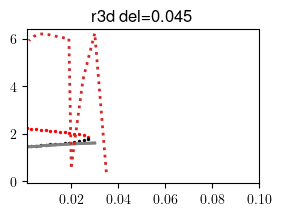

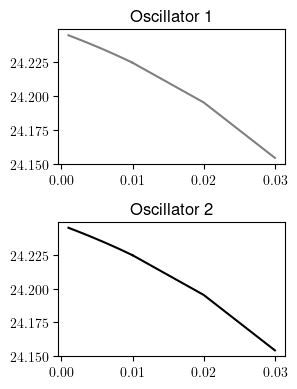

In [98]:
quick_plot_combined(a11_p045,
                    kw_f={'data_list':data_p045_list},
                    kw_r3d={'data_list':data_list_r3d},
                    kw_r={'etup':etup11})

## Sims

In [99]:
# coupling and init
eps11_p045 = 0.045
th_init11_p045 = 3

In [100]:
# sim params
dt = .01;T_p045=15000
t11_p045 = np.arange(0,T_p045,dt)
args11_p045 = {'args':(a11_p045,eps11_p045,del11_p045),
             't_eval':t11_p045,**kw_sim,'dense_output':True}

In [101]:
# initialize and run full
y0a = a11_p045.system1.lc['dat'][int((th_init11_p045/(2*np.pi)) * a11_p045.system1.TN),:]
y0b = a11_p045.system2.lc['dat'][int((0/(2*np.pi)) * a11_p045.system2.TN),:]

y0_p045 = np.array([y0a,y0b]).flatten()

solf11_p045 = solve_ivp(_full,[0,t11_p045[-1]],y0_p045, **args11_p045)

In [102]:
solr11_p045 = solve_ivp(_redu_c,[0,t11_p045[-1]],[th_init11_p045],**args11_p045)

In [103]:
# solr12b_p045 = solve_ivp(_redu_3dc,[0,t11_p045[-1]],
#                     [th_init11_p045,0,0],**args11_p045)

In [104]:
tp12a_p045, phase12a_p045 = get_phase(t11_p045,solf11_p045.y.T[:,:4],
                            skipn=50,system1=a11_p045.system1)
tp12b_p045, phase12b_p045 = get_phase(t11_p045,solf11_p045.y.T[:,4:],
                            skipn=50,system1=a11_p045.system2)

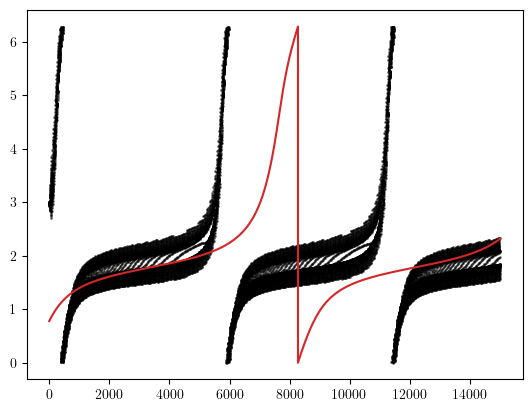

In [106]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p045 - a11_p045.om*phase12b_p045,2*np.pi)
# y = phase12a_p045 - a11_p045.om*phase12b_p045
axs.scatter(tp12a_p045,y,s=1,alpha=.5,color='black')

axs.plot(t11_p045,np.mod(solr11_p045.y.T,a11_p045.T)/a11_p045.T*2*np.pi,color='tab:red')

# axs.set_ylim(-.5,2*np.pi+.5)